In [5]:
import matplotlib.pyplot as plt  #matplotlib画图库
from sklearn.model_selection import train_test_split #拆分数据集
from sklearn.datasets import fetch_lfw_people #导入LFW人脸数据集
from sklearn.model_selection import GridSearchCV #导入网格搜索
from sklearn.metrics import classification_report #导入精度、召回率、F1
from sklearn.svm import SVC #导入SVM库
from sklearn.decomposition import PCA #导入PCA降维库


In [42]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70,resize = 0.4)


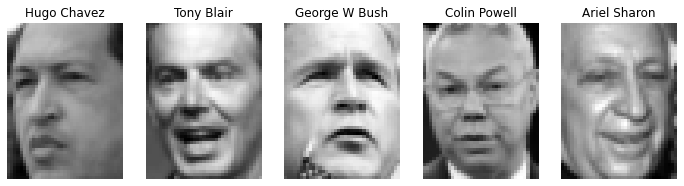

In [43]:
# Display a few face images
fig, axarr = plt.subplots(1, 5, figsize=(12, 5))
for i in range(5):
    axarr[i].imshow(lfw_dataset.images[i], cmap='gray')
    axarr[i].set_title(lfw_dataset.target_names[lfw_dataset.target[i]])
    axarr[i].axis('off')
plt.show()

In [7]:
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

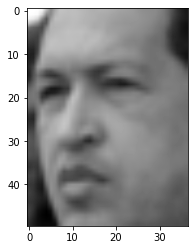

In [11]:
plt.imshow(lfw_people.images[0], cmap="gray",interpolation="bilinear")

In [15]:
# Check images format
n_samples, h, w = lfw_people.images.shape
n_samples, h, w # n_samples shows image amount

(1288, 50, 37)

In [44]:
target_names = lfw_people.target_names
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [47]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [18]:
n_classes = lfw_people.target_names.shape[0]
n_classes


7

In [60]:
x_train,x_test,y_train,y_test = train_test_split(lfw_people.data,lfw_people.target)
x_train.shape,y_train.shape

((966, 1850), (966,))

In [61]:
model = SVC(kernel = 'rbf',class_weight = 'balanced')
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions,target_names=lfw_people.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.69      0.71        16
     Colin Powell       0.73      0.86      0.79        59
  Donald Rumsfeld       0.92      0.80      0.86        30
    George W Bush       0.95      0.84      0.89       143
Gerhard Schroeder       0.67      0.67      0.67        27
      Hugo Chavez       0.68      0.85      0.76        20
       Tony Blair       0.67      0.81      0.73        27

         accuracy                           0.82       322
        macro avg       0.76      0.79      0.77       322
     weighted avg       0.83      0.82      0.82       322



# PCA Start

In [53]:
n_components = 100
pca = PCA(n_components = n_components,whiten = True).fit(lfw_people.data)


In [54]:
# Display the PCA principal components (feature faces)
components = pca.components_.reshape((n_components, lfw_people.images.shape[1], lfw_people.images.shape[2]))

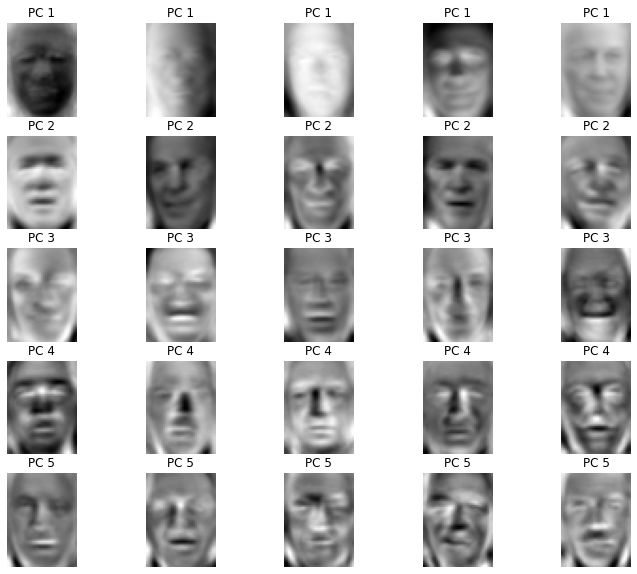

In [58]:
# Display the first few principal components (feature faces)
fig, axarr = plt.subplots(5, 5, figsize=(12, 10))
for i in range(5):
    for j in range(5):
        axarr[i][j].imshow(components[i * 5 + j], cmap='gray')
        axarr[i][j].set_title(f"PC {i + 1}")
        axarr[i][j].axis('off')

plt.show()

In [23]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca.shape


(966, 100)

In [24]:
model = SVC(kernel = 'rbf',class_weight = 'balanced')
model.fit(x_train_pca,y_train)


SVC(class_weight='balanced')

In [25]:
predictions = model.predict(x_test_pca)
print(classification_report(y_test,predictions,target_names = target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.68      0.81        22
     Colin Powell       0.74      0.93      0.82        55
  Donald Rumsfeld       0.84      0.72      0.78        36
    George W Bush       0.84      0.93      0.88       125
Gerhard Schroeder       0.90      0.70      0.79        27
      Hugo Chavez       1.00      0.62      0.76        21
       Tony Blair       0.83      0.81      0.82        36

         accuracy                           0.84       322
        macro avg       0.88      0.77      0.81       322
     weighted avg       0.85      0.84      0.83       322



In [27]:
param_grid = {'C':[0.1,1,5,10,100],
              'gamma':[0.005,0.001,0.005,0.01],}
model.fit(x_train_pca,y_train)


SVC(class_weight='balanced')

In [29]:
predictions = model.predict(x_test_pca)
print(classification_report(y_test,predictions,target_names = target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.68      0.81        22
     Colin Powell       0.74      0.93      0.82        55
  Donald Rumsfeld       0.84      0.72      0.78        36
    George W Bush       0.84      0.93      0.88       125
Gerhard Schroeder       0.90      0.70      0.79        27
      Hugo Chavez       1.00      0.62      0.76        21
       Tony Blair       0.83      0.81      0.82        36

         accuracy                           0.84       322
        macro avg       0.88      0.77      0.81       322
     weighted avg       0.85      0.84      0.83       322



In [35]:
def plot_gallery(images,titles,h,w,n_row = 3,n_col=5):
    plt.figure(figsize=(1.8 * n_col,2.4 * n_row))
    plt.subplots_adjust(bottom = 0,left = .01,right = .99,top = .90,hspace = .35)
    for i in range(n_row * n_col):
        plt.subplot(n_row , n_col, i + 1)
        plt.imshow(images[i].reshape((h,w)),cmap = plt.cm.gray)
        plt.title(titles[i],size = 12)
        plt.xticks(())
        plt.xticks(())
def title(predictions,y_est,target_names,i):
    pred_name = target_names[predictions[i]].split(' ')[-1]
    true_name = target_names[y_test[i]].split(' ')[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


In [38]:
prediction_titles = [title(predictions,y_test,target_names,i)\
                    for i in range(len(predictions))]


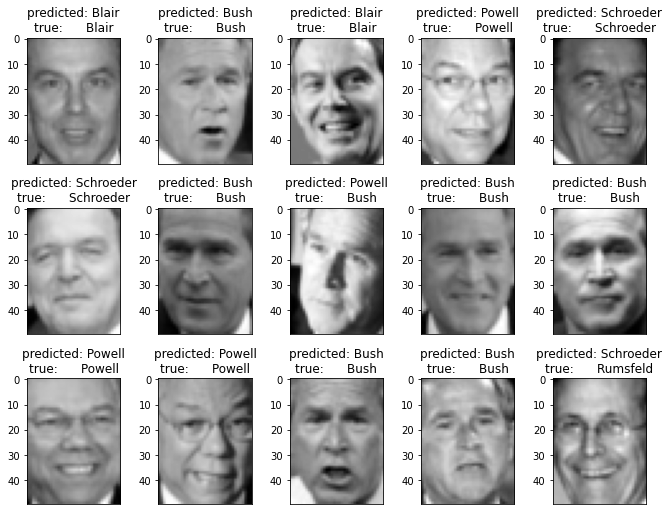

In [39]:
plot_gallery(x_test, prediction_titles, h, w)


In [62]:
plt.show()

# PCA END

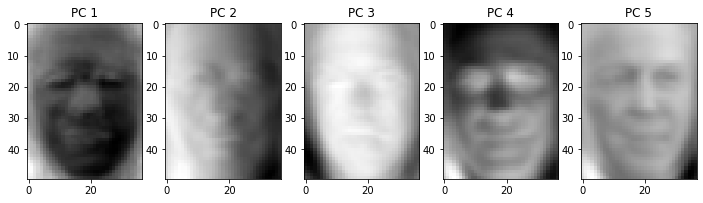

In [63]:
from sklearn.decomposition import PCA

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Perform PCA to reduce dimensionality
n_components = 150  # Adjust the number of components as needed
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(lfw_people.data)

# Display the PCA principal components (feature faces)
components = pca.components_.reshape((n_components, lfw_people.images.shape[1], lfw_people.images.shape[2]))

# Display the first few principal components (feature faces)
fig, axarr = plt.subplots(1, 5, figsize=(12, 5))
for i in range(5):
    axarr[i].imshow(components[i], cmap='gray')
    axarr[i].set_title(f"PC {i + 1}")

plt.show()
